In [2]:
import tensorflow as tf
from keras import Sequential
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping , ReduceLROnPlateau, ModelCheckpoint

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5
)

model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding="same"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)
model_checkpoint = ModelCheckpoint('model.keras', verbose=1, monitor='val_loss', mode='min', save_best_only=True)

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,418 (427.41 KB)

 Trainable params: 109,354 (427.16 KB)

 Non-trainable params: 64 (256.00 B)

In [3]:
history = model.fit(x_train, y_train, epochs=20, batch_size=42, validation_data=(x_test, y_test),callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/20
1422/1429 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8472 - loss: 0.5620
Epoch 1: val_loss improved from inf to 0.05617, saving model to model.keras
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8476 - loss: 0.5607 - val_accuracy: 0.9841 - val_loss: 0.0562 - learning_rate: 0.0010
Epoch 2/20
1426/1429 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9575 - loss: 0.1483
Epoch 2: val_loss improved from 0.05617 to 0.04871, saving model to model.keras
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9575 - loss: 0.1483 - val_accuracy: 0.9824 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 3/20
1423/1429 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9655 - loss: 0.1109
Epoch 3: val_loss improved from 0.04871 to 0.03652, saving model to model.keras
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9655 - loss: 0.1109 - val_accuracy: 0.9879 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 4/20
1422/1429 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Example Predictions:
True Labels: [7 2 1 0 4 1 4 9 5 9]
Predicted Probabilities: [[7.1230036e-11 7.3757406e-10 3.2889744e-09 4.6253563e-11 7.0454982e-11
  7.5318664e-14 1.4381961e-12 1.0000000e+00 1.0470635e-12 1.0749370e-11]
 [1.0959074e-07 1.1525640e-09 9.9999917e-01 4.8957989e-09 1.4171022e-09
  2.2814067e-11 1.2653999e-07 5.3481233e-07 7.3190898e-10 8.9905326e-11]
 [1.3612462e-08 9.9999785e-01 6.2621952e-09 3.8676782e-09 1.2057231e-07
  3.1281488e-08 4.5077751e-08 1.8792779e-06 1.0625567e-08 9.8964330e-09]
 [9.9999976e-01 7.3062206e-10 1.5124915e-07 5.8960115e-12 1.4357854e-10
  1.7774922e-10 1.0270646e-07 2.2167252e-09 9.8603703e-09 1.6276167e-09]
 [3.9664310e-11 5.4136690e-10 3.5934034e-12 1.7885606e-11 9.9999964e-01
  2.7609722e-11 8.3093105e-10 2.3253688e-09 7.3624801e-11 3.4496529e-07]
 [4.6041104e-09 9.9999928e-01 7.0043527e-09 2.5091279e-10 1.2322560e-07
  1.9600208e-09 3.4626013e-09 6.1992785e-07 1.4492478e-09 4.7448340e-10]
 [8.4418

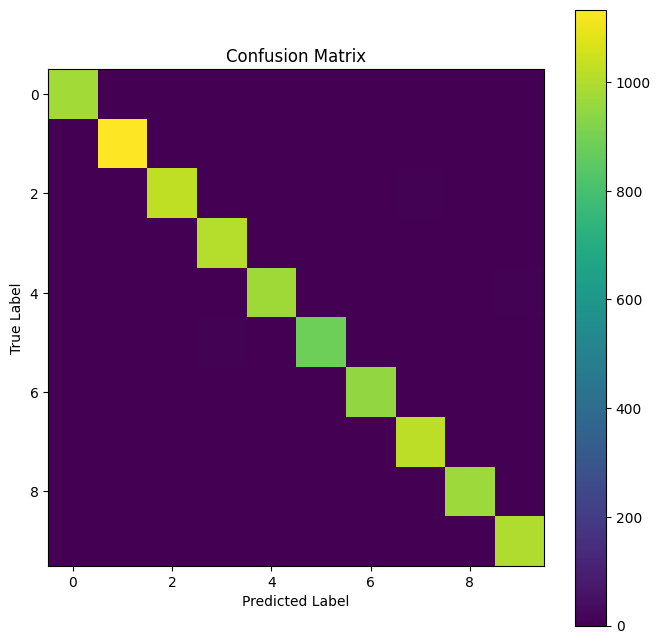

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_pred_probabilities = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

print("Example Predictions:")
print("True Labels:", y_test[:10])
print("Predicted Probabilities:", y_pred_probabilities[:10])
print("Predicted Classes:", y_pred_classes[:10])

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 8))
plt.imshow(conf_mat, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()